In [1]:
import torch

In [2]:
from google.colab import drive
import os

# Remount Google Drive
drive.mount('/content/gdrive', force_remount=True)

# Specify the dataset path
dataset_path = '/content/gdrive/My Drive/Nuscenes-Lidar-to-Depth-Image'

# Check if the path exists and list the files in the directory
if os.path.exists(dataset_path):
    os.chdir(dataset_path)
    print(sorted(os.listdir()))
else:
    print("Dataset not found at the specified path. Please verify the path and try again.")


Mounted at /content/gdrive
['Lidar_to_Depth.ipynb', 'nuscenes']


In [3]:
nuscenes_path = '/content/gdrive/My Drive/Nuscenes-Lidar-to-Depth-Image/nuscenes/python_sdk/'

# Check if the path exists and list the files in the directory
if os.path.exists(nuscenes_path):
    os.chdir(nuscenes_path)
    print(sorted(os.listdir()))
else:
    print("Dataset not found at the specified path. Please verify the path and try again.")

['grayscale_depth_map_updated.jpg', 'grayscale_depth_map_updated.png', 'grayscale_depth_map_updated_pli.jpg', 'nuimages', 'nuscenes', 'tutorials']


In [4]:
pwd

'/content/gdrive/My Drive/Nuscenes-Lidar-to-Depth-Image/nuscenes/python_sdk'

In [5]:
!pip install pyquaternion

In [6]:
from nuscenes import NuScenes


In [7]:
nuscenes_mini_path = '/content/gdrive/My Drive/0A Praktikum/nuscenes/v1.0-mini/'


# from nuscenes import NuScenes

# Initialize the NuScenes dataset
nusc = NuScenes('v1.0-mini', dataroot=nuscenes_mini_path)

# Access and work with different parts of the dataset
scene = nusc.scene[0]  # Access the first scene
sample_token = scene['first_sample_token']
sample = nusc.get('sample', sample_token)  # Access the sample

# Work with the data (e.g., lidar point clouds, annotations, etc.)
# Example: Access lidar data
lidar_data = nusc.get('sample_data', sample['data']['LIDAR_TOP'])
# Continue working with the dataset as needed


Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.606 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


Image saved


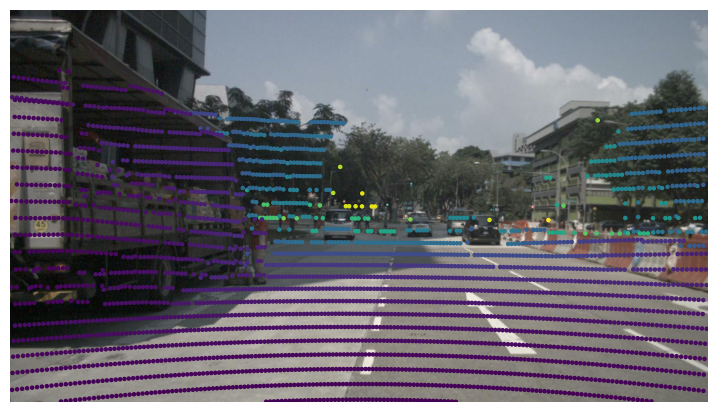

In [31]:
my_sample = nusc.sample[1]
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP')

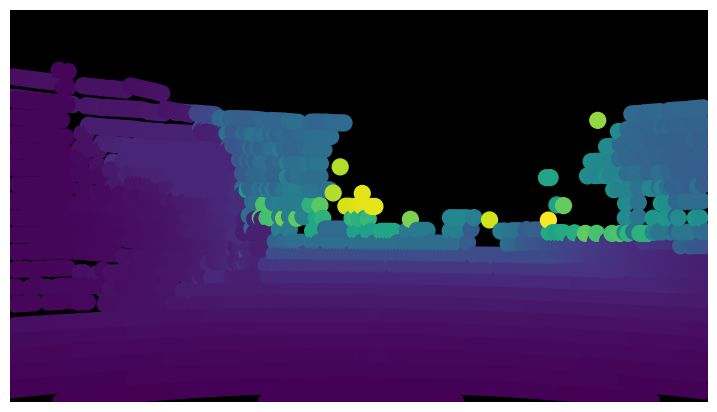

In [35]:
# render depth map using lidar
my_sample = nusc.sample[1]
nusc.render_lidar_pointcloud_in_image(my_sample['token'],  camera_channel= 'CAM_FRONT', pointsensor_channel='LIDAR_TOP',dot_size=130)

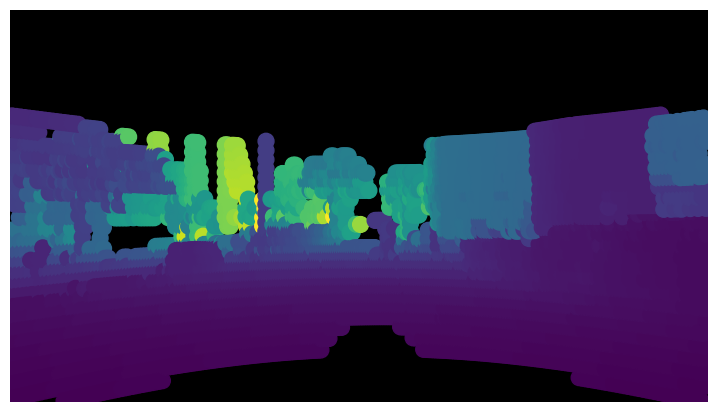

In [51]:
# render depth map using lidar
my_sample = nusc.sample[1]
nusc.render_lidar_pointcloud_in_image(my_sample['token'], camera_channel= 'CAM_BACK',pointsensor_channel='LIDAR_TOP',dot_size=130)

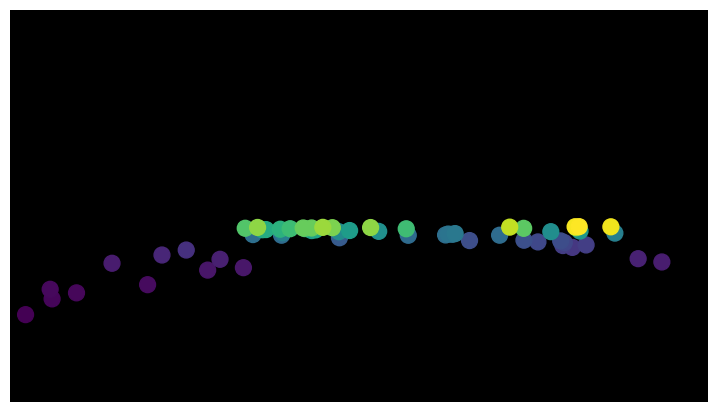

In [50]:
# render depth map using radar
my_sample = nusc.sample[1]
nusc.render_radar_pointcloud_in_image(my_sample['token'], pointsensor_channel='RADAR_FRONT', camera_channel = "CAM_FRONT", dot_size=130)

# Generating deoth images for the nuscenes mini dataset

In [42]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

def ConverToDepth(camera_channel,output_folder):  # Ex: camera_channel == "CAM_FRONT"
    counter = 0
    for i in range(len(nusc.scene)):
        print("Converting the images of",camera_channel, "to RGB depth images and saving the generated depth images has started")
        first_sample_token = nusc.scene[i]['first_sample_token']
        my_sample = nusc.get('sample', first_sample_token)

        while True:
            cam_front_data = nusc.get(
                'sample_data', my_sample['data'][camera_channel])
            camera_file_name = os.path.basename(
                cam_front_data['filename'])

            nusc.render_lidar_pointcloud_in_image(
              my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=130, out_path=os.path.join(
                  output_folder, camera_file_name),
              camera_channel=camera_channel
              )
            counter += 1  # Increment counter for the next image

            # Move to the next sample
            if my_sample['next'] == '':
                break
            else:
                my_sample = nusc.get('sample', my_sample['next'])
    print(counter)

In [44]:
# For CAM_BACK
output_folder_depth_RGB="/content/gdrive/My Drive/Nuscenes-Lidar-to-Depth-Image/depth_output/RGB/"
ConverToDepth("CAM_BACK",output_folder_depth_RGB)




Output hidden; open in https://colab.research.google.com to view.

In [49]:
ConverToDepth("CAM_FRONT_LEFT",output_folder_depth_RGB)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# You can run the following code for converting the other cameras' images to RGB depth images

# ConverToDepth("CAM_FRONT",output_folder_depth_RGB)
# ConverToDepth("CAM_FRONT_RIGHT",output_folder_depth_RGB)

# ConverToDepth("CAM_BACK_RIGHT",output_folder_depth_RGB)
# ConverToDepth("CAM_BACK_LEFT",output_folder_depth_RGB)



# Converting RGB depth images to grayscale

In [46]:
import os
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

# Path to the folder containing the RGB depth images
input_folder = '/content/gdrive/My Drive/Nuscenes-Lidar-to-Depth-Image/depth_output/RGB'

# Path to the folder where you want to save the grayscale depth maps
output_folder = '/content/gdrive/My Drive/Nuscenes-Lidar-to-Depth-Image/depth_output/grayscale/'


os.makedirs(output_folder, exist_ok=True)

# List all files in the input folder
input_files = os.listdir(input_folder)


for input_file in input_files:
    # Check if the file is an image
    if input_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Construct the full path to the input image
        input_image_path = os.path.join(input_folder, input_file)

        # Load the RGB depth image
        rgb_depth_image = cv2.imread(input_image_path)

        # Take the average across all channels to create a grayscale depth image
        grayscale_depth_map = np.mean(rgb_depth_image, axis=2).astype(np.uint8)

        # Display the grayscale depth image
        cv2_imshow(grayscale_depth_map)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        ##Save the grayscale depth map with the same name as the original image in the output folder
        output_image_path = os.path.join(output_folder, input_file)
        cv2.imwrite(output_image_path, grayscale_depth_map)


Output hidden; open in https://colab.research.google.com to view.